In [3]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [4]:
sim1 = pd.read_csv("sim1.csv")

In [5]:
sim1

,x,y
0,1,4.20
1,1,7.51
2,1,2.13
...,...,...
27,10,24.97
28,10,23.35
29,10,21.98


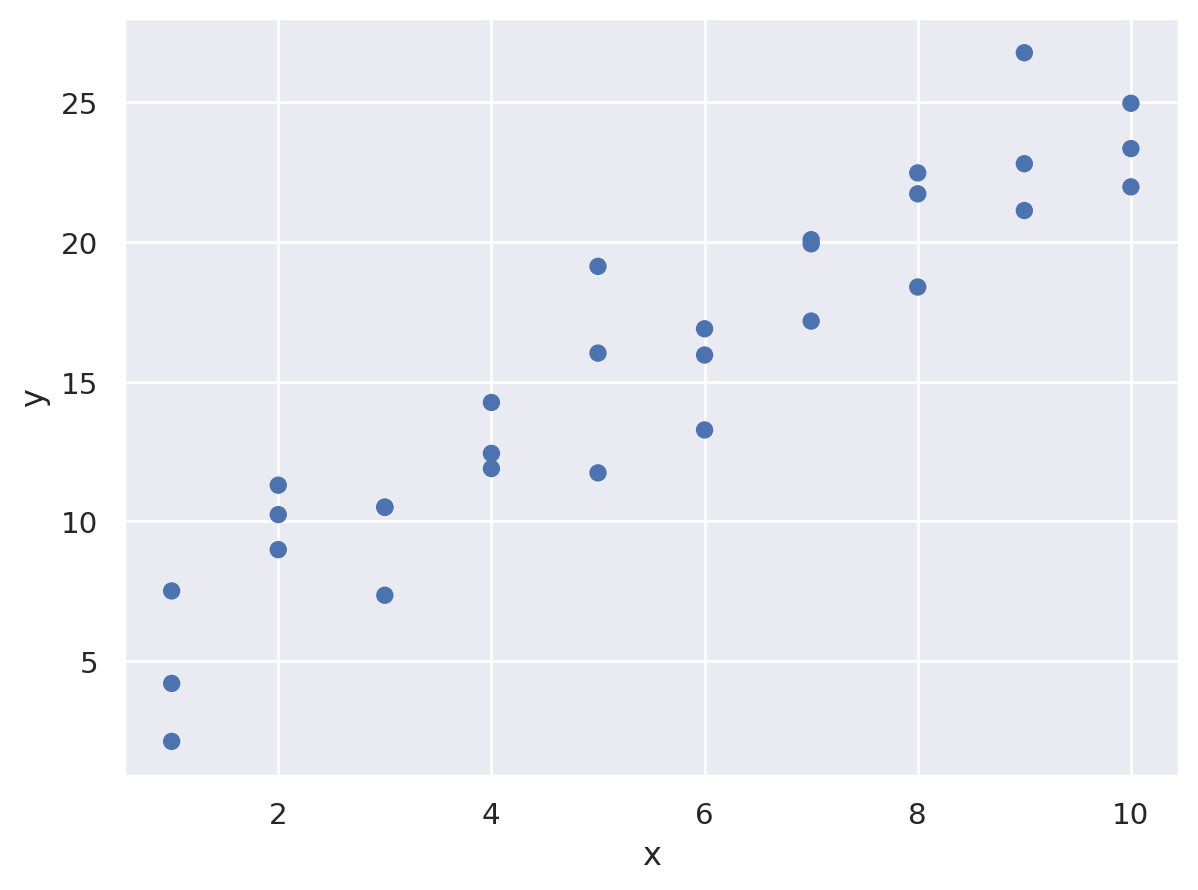

In [6]:
(
  so.Plot(sim1, x ='x', y = 'y')
  .add(so.Dot())
)

# OLS estimation 코드
## 거리 d가 최소가 되는 파라미터를 구하면, a family of models 중 best model을 만들 수 있음
## 이 squared error가 최소가 되도록 하는 것을 ordinary least squares(OLS) estimator라고 함
## Error가 Gaussian 일때, 이 OLS는 적절한 parameter를 추정하게 됨.

## 수식 만드는 법

In [7]:
from statsmodels.formula.api import ols

mod = ols('y ~ x', data=sim1).fit()
display(mod.summary().tables[0], mod.summary().tables[1])

Dep. Variable:,y,R-squared:,0.885
Model:,OLS,Adj. R-squared:,0.880
Method:,Least Squares,F-statistic:,214.7
Date:,"Fri, 07 Jun 2024",Prob (F-statistic):,1.17e-14
Time:,15:06:57,Log-Likelihood:,-65.226
No. Observations:,30,AIC:,134.5
Df Residuals:,28,BIC:,137.3
Df Model:,1,,
Covariance Type:,nonrobust,,


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.2208,0.869,4.858,0.000,2.441,6.001
x,2.0515,0.140,14.651,0.000,1.765,2.338


## 파라미터 뽑는 법

In [9]:
from statsmodels.formula.api import ols
sim1_mod = ols("y ~ x", data = sim1)

sim1_mod.fit().params  # 모델의 parameter 즉, coefficients를 내줌
# Intercept   4.22
# x           2.05     # 위에서 구한 파라미터값과 동일함

Intercept   4.22
x           2.05
dtype: float64

# 예측의 정확도인 RMSE, MAE, R-squared 계산하는 코드

In [8]:
from statsmodels.tools.eval_measures import rmse, meanabs
ypred = mod.predict(sim1)
y = sim1["y"]

print(f"RMSE = {rmse(y, ypred):.2f} \nMAE = {meanabs(y, ypred):.2f} \nR-squared = {mod.rsquared:.2f}")

RMSE = 2.13 
MAE = 1.71 
R-squared = 0.88


In [27]:
# R-squared 계산하기
display(mod.rsquared)

0.8846124228013018

# 잔차를 시각화해서 Gaussian인지 확인하는 코드

<Axes: >

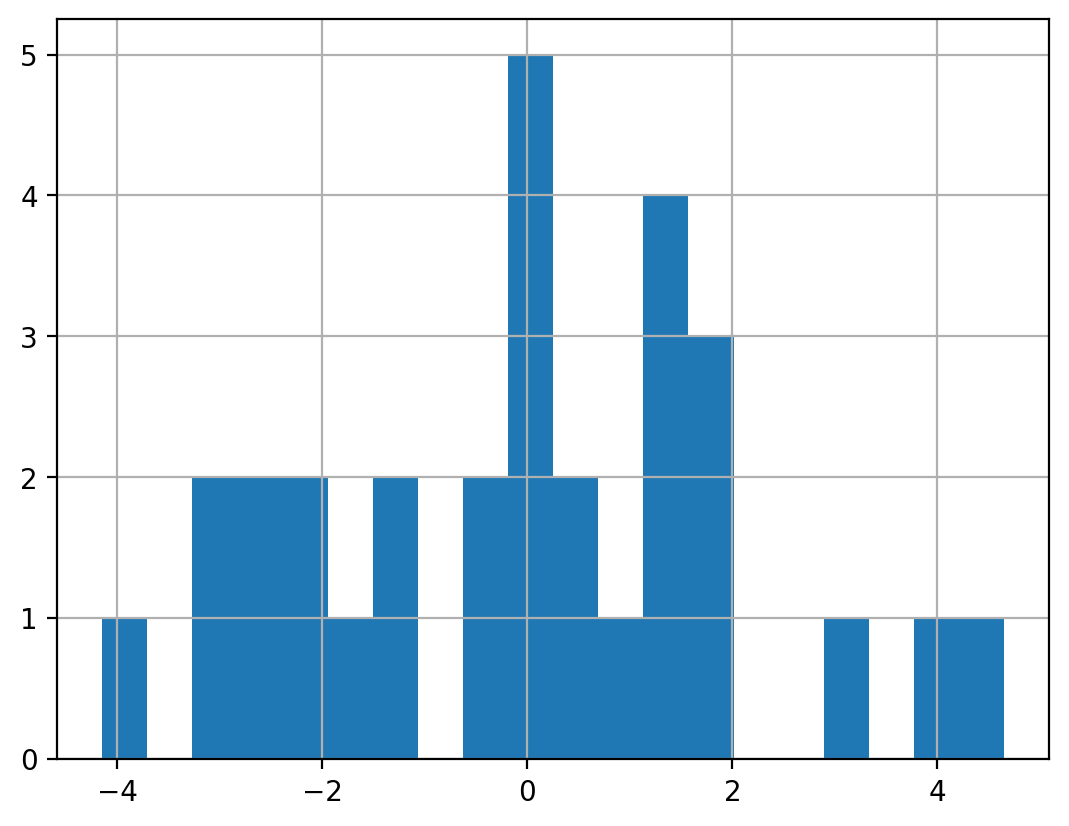

In [14]:
sim1["resid"] = mod.resid

sim1["resid"].hist(bins=20)

# category 변수인 경우 numeric으로 바꿔주는 코드 (직접 변환)

In [18]:
df = pd.DataFrame({"sex": ["male", "female", "male", "neutral"], "response": [10, 21, 13, 5]})

pd.get_dummies(df["sex"], prefix="sex")  # drop_first=True

,sex_female,sex_male,sex_neutral
0,False,True,False
1,True,False,False
2,False,True,False
3,False,False,True


# 연속형 변수 2개 사이의 상호작용이 있는 경우

In [21]:
np.random.seed(123)
x1 = np.random.uniform(0, 10, 200)
x2 = 2*x1 - 1 + np.random.normal(0, 12, 200)
y = x1 + x2 + x1*x2 + np.random.normal(0, 50, 200)
df = pd.DataFrame(dict(precip=x1, wind=x2, delay=y))
df

,precip,wind,delay
0,6.96,4.04,95.70
1,2.86,5.60,31.23
2,2.27,8.37,-30.97
...,...,...,...
197,7.45,16.38,186.67
198,4.73,-18.56,-96.90
199,1.22,-5.63,-22.95


In [22]:
# additive model
mod1 = ols('delay ~ precip + wind', data=df).fit()

# interaction model
mod2 = ols('delay ~ precip + wind + precip:wind', data=df).fit()

# 연속형 범주와 범주형 변수가 서로 상호작용하는 경우

In [24]:
sim3 = pd.read_csv("sim3.csv")
sim3

,x1,x2,rep,y,sd
0,1,a,1,-0.57,2
1,1,a,2,1.18,2
2,1,a,3,2.24,2
...,...,...,...,...,...
117,10,d,1,6.56,2
118,10,d,2,5.06,2
119,10,d,3,5.14,2


In [25]:
mod2 = ols('y ~ x1 * x2', data=sim3).fit() # 같은 의미 'y ~ x1 + x2 + x1:x2'

# grid 만들어서 예측해보기

In [15]:
grid = pd.DataFrame(dict(x=np.linspace(sim1.x.min(), sim1.x.max(), 10)))   #

# a model for sim1
from statsmodels.formula.api import ols
sim1_mod = ols("y ~ x", data=sim1).fit()

grid["pred"] = sim1_mod.predict(grid) # column 이름이 매치되어야 함
grid

,x,pred
0,1.00,6.27
1,2.00,8.32
2,3.00,10.38
...,...,...
7,8.00,20.63
8,9.00,22.68
9,10.00,24.74


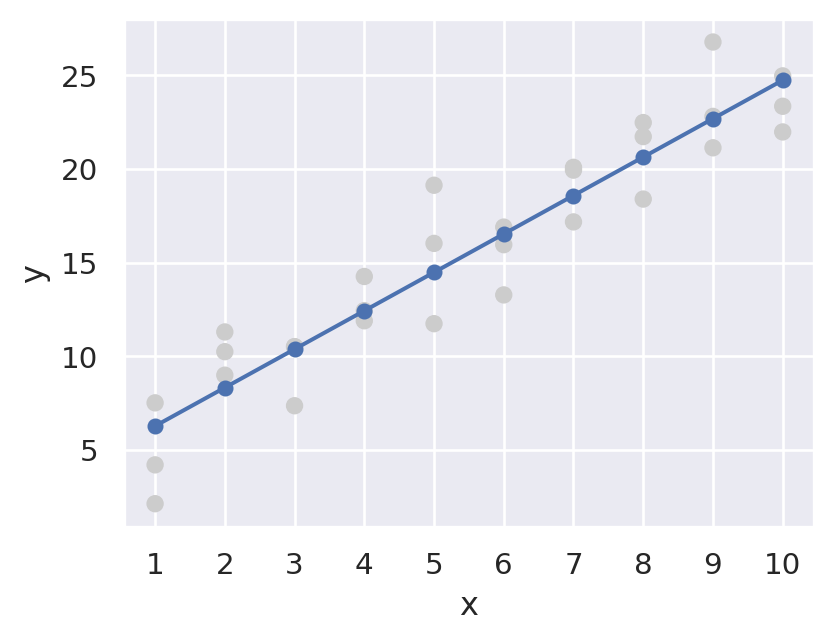

In [16]:
(
    so.Plot(sim1, x='x', y='y')
    .add(so.Dot(color=".8"))
    .add(so.Line(marker=".", pointsize=10), x=grid.x, y=grid.pred)  # prediction!
    .layout(size=(4.5, 3.5))
    .scale(x=so.Continuous().tick(at=grid.x))
)

# long_format 만들어서 resid 구하기

In [28]:
mod1 = ols('y ~ x1 + x2', data=sim3).fit()
mod2 = ols('y ~ x1 * x2', data=sim3).fit() # 같은 의미 'y ~ x1 + x2 + x1:x2'

In [29]:
sim3["mod1"] = mod1.resid
sim3["mod2"] = mod2.resid

sim3_long = sim3.melt(
    id_vars=["x1", "x2"],
    value_vars=["mod1", "mod2"],
    var_name="model",
    value_name="resid",
)
sim3_long

,x1,x2,model,resid
0,1,a,mod1,-2.25
1,1,a,mod1,-0.49
2,1,a,mod1,0.56
...,...,...,...,...
237,10,d,mod2,2.59
238,10,d,mod2,1.08
239,10,d,mod2,1.16


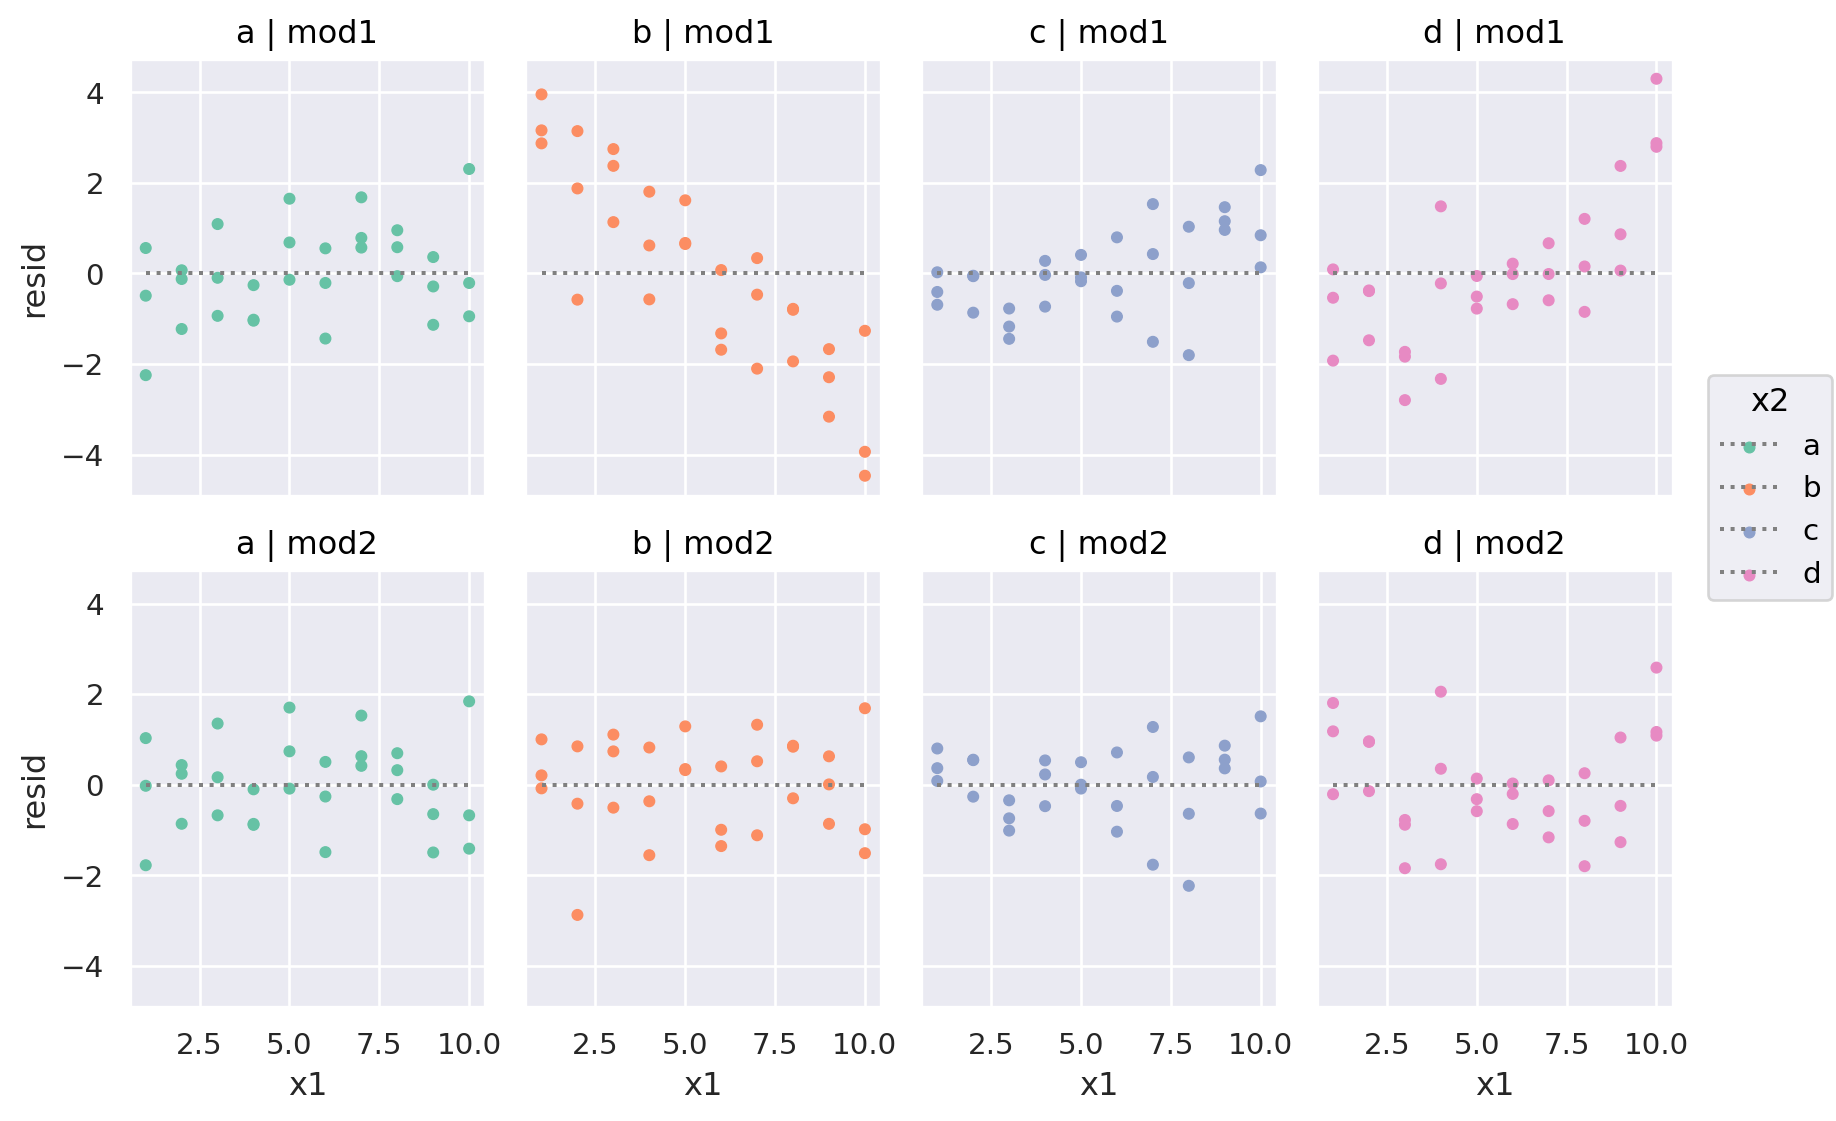

In [30]:
(
    so.Plot(sim3_long, x="x1", y="resid", color="x2")
    .add(so.Dot(pointsize=4))
    .add(so.Line(linestyle=":", color=".5"), so.Agg(lambda x: 0))
    .facet("x2", "model")
    .layout(size=(9, 6))
    .scale(color="Set2")
)

# 시각화 코드

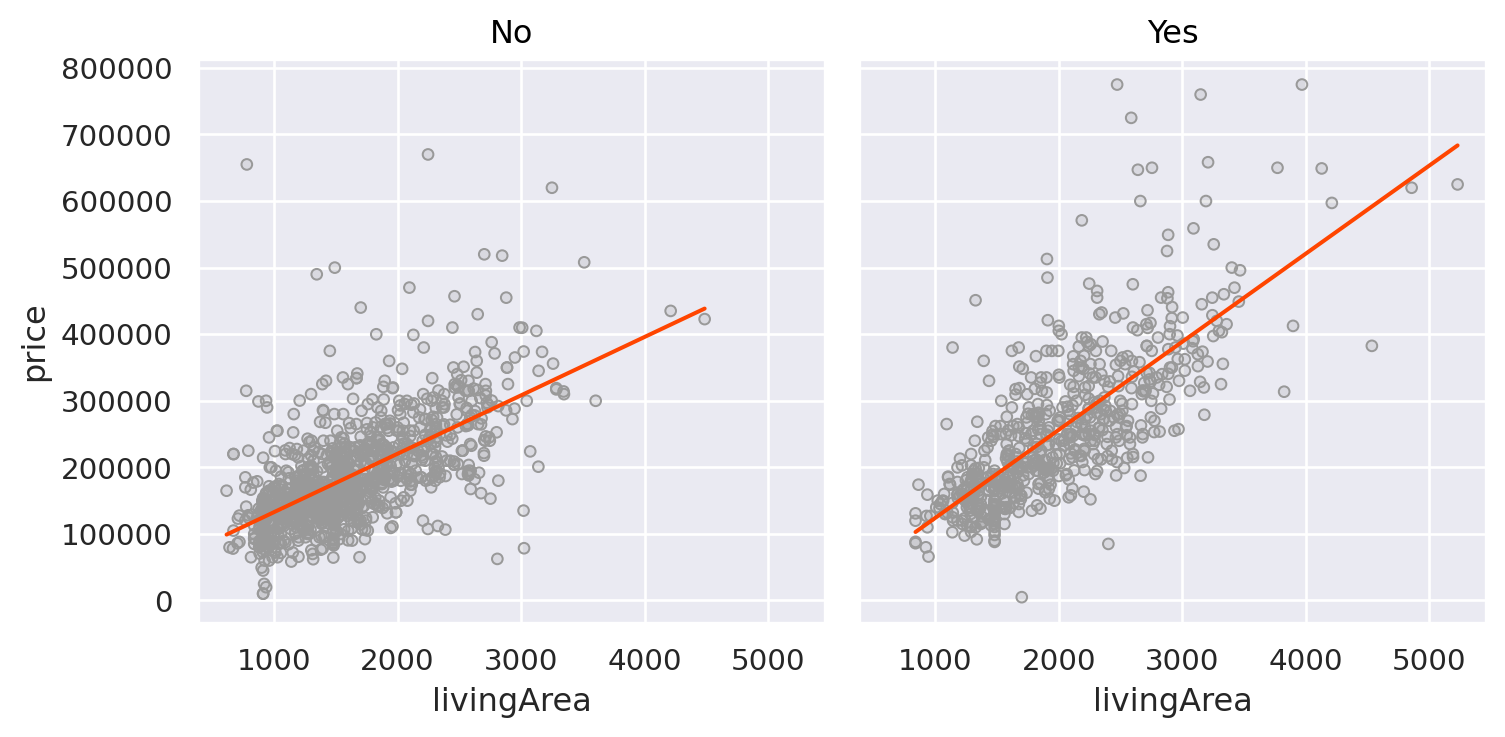

In [31]:
houses = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData").data
(
    so.Plot(houses, x='livingArea', y='price')
    .add(so.Dots(color='.6'))
    .add(so.Line(color="orangered"), so.PolyFit(1))
    .facet("centralAir")
    .layout(size=(8, 4))
)

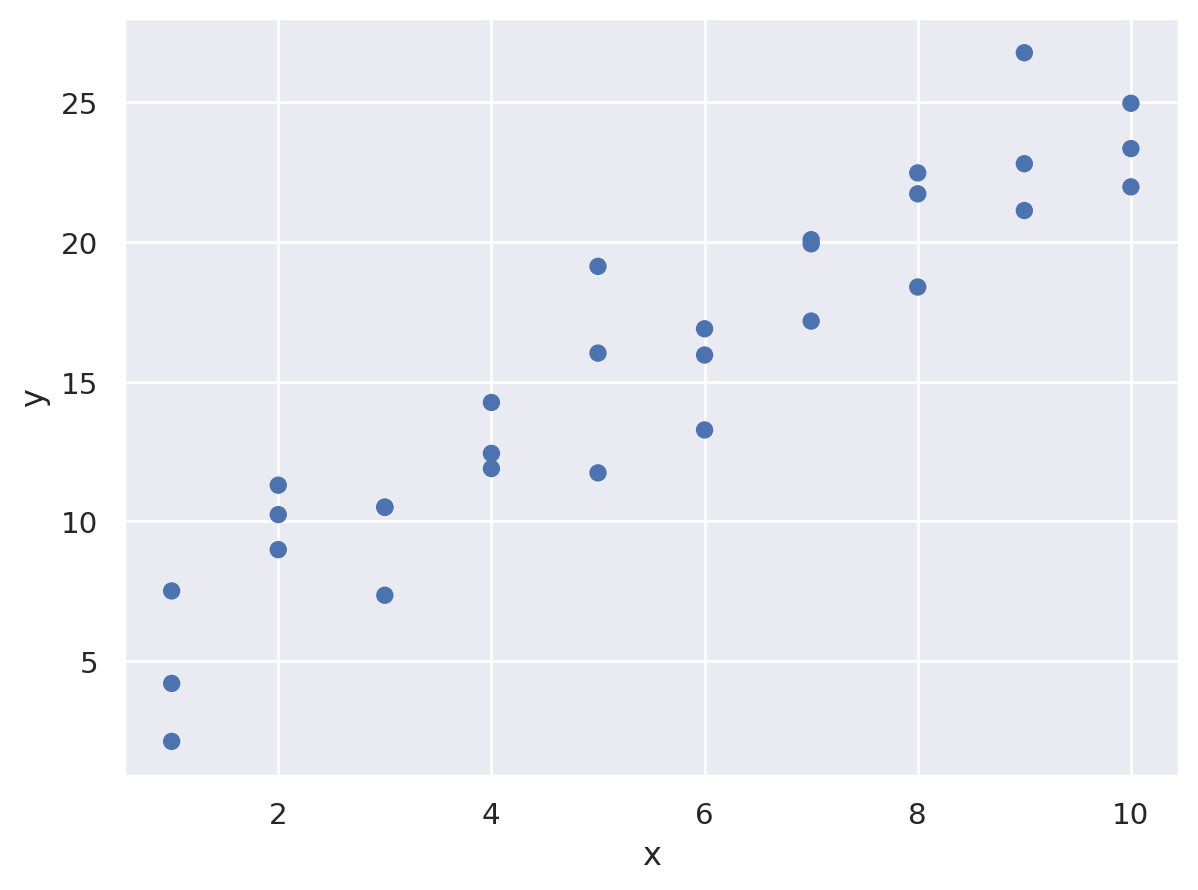

In [32]:
(
  so.Plot(sim1, x ='x', y = 'y')
  .add(so.Dot())
)